## **Module F Numerical Differentiaion**

#### **20.1 Numerical Differentiation Problem Statement**

##### A **numerical grid** is an evenly spaces set of points over the domain of a dunction, over some interval. **np.linspace** is sufficient to generate the one dimensional numerical grids. **numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)**

In [55]:
import numpy as np

In [56]:
np.linspace(2.0, 3.0, num=5)


array([2.  , 2.25, 2.5 , 2.75, 3.  ])

In [57]:
np.linspace(2.0, 3.0, num=5, endpoint=False)

array([2. , 2.2, 2.4, 2.6, 2.8])

In [58]:
np.linspace(2.0, 3.0, num=5, retstep=True)

(array([2.  , 2.25, 2.5 , 2.75, 3.  ]), 0.25)

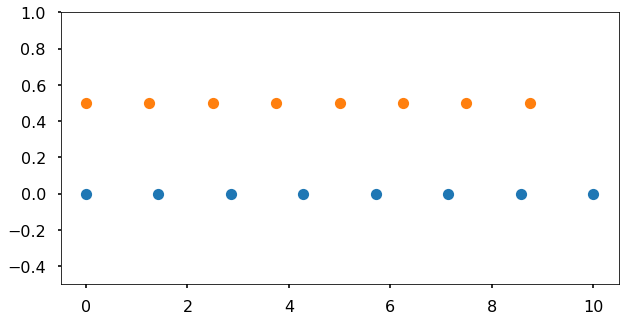

In [59]:
import matplotlib.pyplot as plt
N = 8
y = np.zeros(N)
x1 = np.linspace(0, 10, N, endpoint=True)
x2 = np.linspace(0, 10, N, endpoint=False)
plt.plot(x1, y, 'o')
plt.plot(x2, y + 0.5, 'o')
plt.ylim([-0.5, 1])
plt.show()

#### **20.2: Finite Difference Approximating Derivatives**

##### <hr />

The **derivative** of a function $f'(x)$ at $x = a $ is noted as $f'(a)$, and it is defined as:

$f'(a) = \underset{x \to a}\lim\dfrac{f(x) - f(a)}{x - a}$.

The deriveate at $x = a $ is the slope at this point. I  **finite dfference** approximations of this slopw, we can use values of the function in the neighborhood of the point $x = a $ to achieve the goal.

<hr />

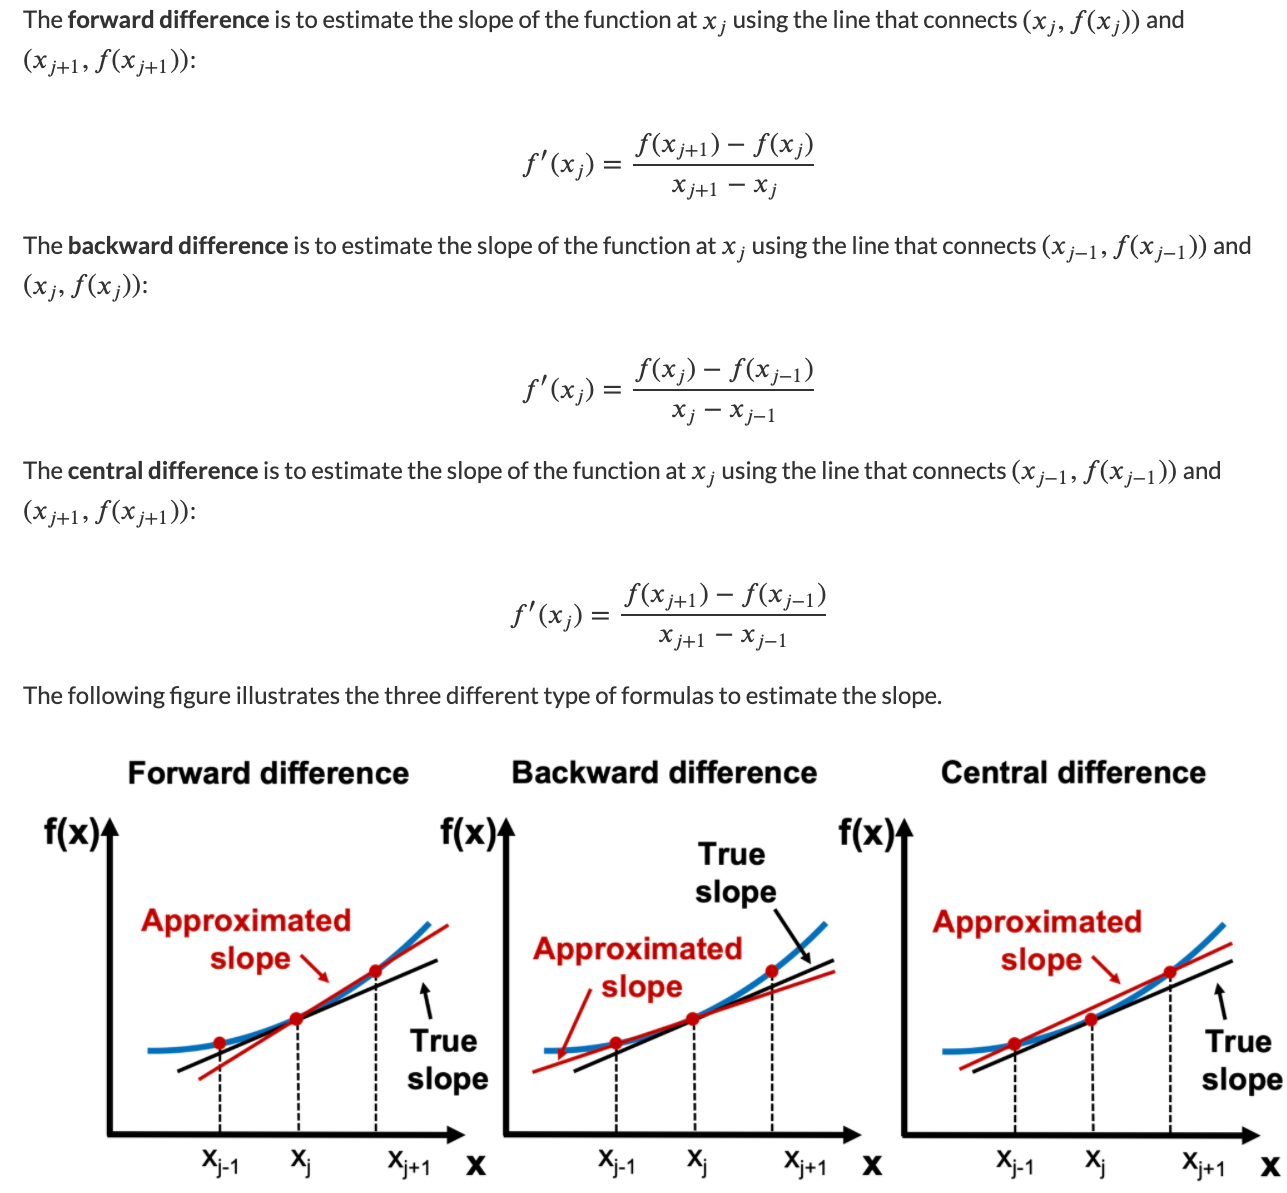

##### For a vector $f$, the common $d=np.diff(f)$ produces an array $d$ in which the entries are the differences of the adjacent elements in the initial array $f$. In other words $d(i) = f(i+1)-f(i)$.

#####EXAMPLE: Consider the function 𝑓(𝑥)=cos(𝑥). We know the derivative of cos(𝑥) is −sin(𝑥). Although in practice we may not know the underlying function we are finding the derivative for, we use the simple example to illustrate the aforementioned numerical differentiation methods and their accuracy. The following code computes the derivatives numerically.

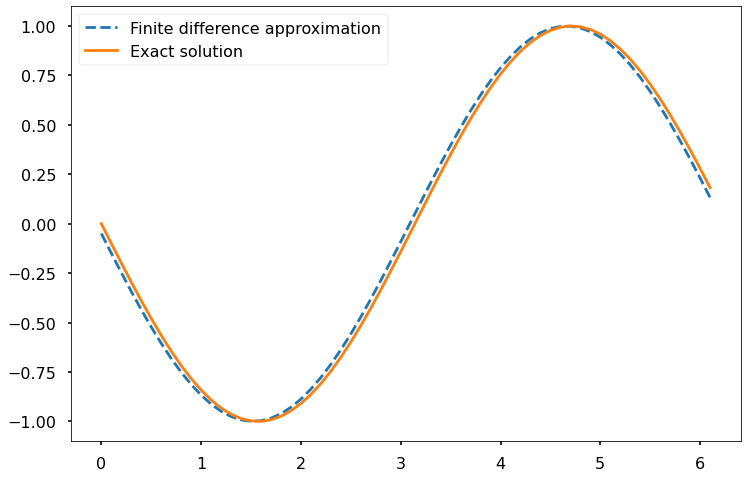

0.049984407218554114


In [60]:
# Example:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function
y = np.cos(x) 

# compute vector of forward differences
forward_diff = np.diff(y)/h 
# compute corresponding grid
x_diff = x[:-1:] 
# compute exact solution
exact_solution = -np.sin(x_diff) 

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between 
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)


#### **20.3:** second orfer approximation. $f''(x_\mathrm{j}) ≈  \dfrac{f(x_\mathrm{j+1}) -2f(x_\mathrm{j})+ f(x_\mathrm{j-1})}{h^2}$ , and is $O(h^2)$

#### **20.4:** Numerical Differentiation with Noise

#### **Exercise**

##### **(1):** Write a function 𝑚𝑦_𝑛𝑢𝑚_𝑑𝑖𝑓𝑓(𝑓,𝑎,𝑏,𝑛,𝑜𝑝𝑡𝑖𝑜𝑛), with the output as [𝑑𝑓,𝑋], where 𝑓 is a function object. The function 𝑚𝑦_𝑛𝑢𝑚_𝑑𝑖𝑓𝑓 should compute the derivative of 𝑓 numerical for 𝑛 evenly spaced points starting at 𝑎 and ending at 𝑏 according to the method defined by 𝑜𝑝𝑡𝑖𝑜𝑛. The input argument 𝑜𝑝𝑡𝑖𝑜𝑛 is one of the following strings: ‘forward’, ‘backward’, ‘central’. Note that for the forward and backward method, the output argument, 𝑑𝑦, should be (𝑛−1) 1D array, and for the central difference method 𝑑𝑦 should be (𝑛−2) 1D array. The function should also output a vector 𝑋 that is the same size as 𝑑𝑦 and denotes the x-values for which 𝑑𝑦 is valid.



In [61]:
import numpy as np

def my_num_diff(f, a, b, n, option):

  x = np.linspace(a, b, n)
  
  h = (b-a)/n  #step size

  X = []
  df = []
  
  if option == 'forward':
    
    for xi in x[:-1]:    #xi ends at the last but second element of x ("loses the last point")
      f_prime = (f(xi+h)-f(xi))/h
      df.append(f_prime)
      X.append(xi)

  elif option == 'backward':
   
    for xi in x[1:]:  # xi starts from the second slement ("loses the first point")
      f_prime = (f(xi)-f(xi-h))/h
      df.append(f_prime)
      X.append(xi)

  elif option == 'central':
   
    for xi in x[1:-1]:  # both the 1st and the last element in x are not included ("loses both the 1st and last points")
      f_prime = (f(xi+h)-f(xi-h))/(2*h)
      df.append(f_prime)
      X.append(xi)


  return [df, X]

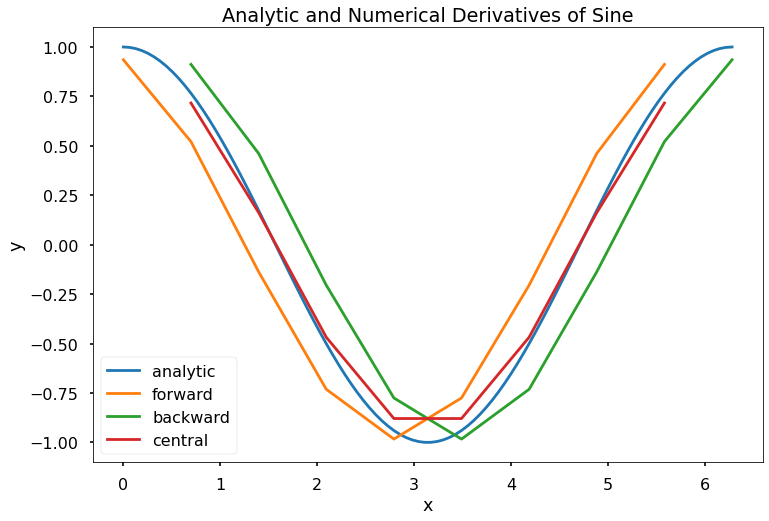

In [62]:
#test case (1)
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
f = lambda x: np.sin(x)
[dyf, Xf] = my_num_diff(f, 0, 2*np.pi, 10, 'forward')
[dyb, Xb] = my_num_diff(f, 0, 2*np.pi, 10, 'backward')
[dyc, Xc] = my_num_diff(f, 0, 2*np.pi, 10, 'central')
plt.figure(figsize = (12, 8))
plt.plot(x, np.cos(x), label = 'analytic')
plt.plot(Xf, dyf, label = 'forward')
plt.plot(Xb, dyb, label = 'backward')
plt.plot(Xc, dyc, label = 'central')
plt.legend()
plt.title('Analytic and Numerical Derivatives of Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


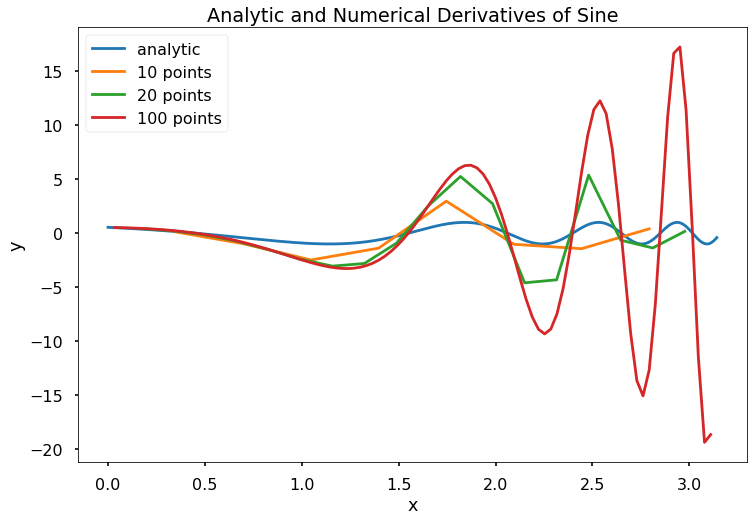

In [63]:
# test case (2)
import matplotlib.pyplot as plt

x = np.linspace(0, np.pi, 1000)
f = lambda x: np.sin(np.exp(x))
[dy10, X10] = my_num_diff(f, 0, np.pi, 10, 'central')
[dy20, X20] = my_num_diff(f, 0, np.pi, 20, 'central')
[dy100, X100] = my_num_diff(f, 0, np.pi, 100, 'central')
plt.figure(figsize = (12, 8))
plt.plot(x, np.cos(np.exp(x)), label = 'analytic')
plt.plot(X10, dy10, label = '10 points')
plt.plot(X20, dy20, label = '20 points')
plt.plot(X100, dy100, label = '100 points')
plt.legend()
plt.title('Analytic and Numerical Derivatives of Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##### **(2):** Write a function 𝑚𝑦_𝑛𝑢𝑚_𝑑𝑖𝑓𝑓_𝑤_𝑠𝑚𝑜𝑜𝑡ℎ𝑖𝑛𝑔(𝑥,𝑦,𝑛), with the output [𝑑𝑦,𝑋],where 𝑥 and 𝑦 are 1D numpy array of the same length, and 𝑛 is a strictly positive scalar. The function should first create a vector of “smoothed” 𝑦 data points where 𝑦_𝑠𝑚𝑜𝑜𝑡ℎ[𝑖]=𝑛𝑝.𝑚𝑒𝑎𝑛(𝑦[𝑖−𝑛:𝑖+𝑛]). The function should then compute 𝑑𝑦, the derivative of the smoothed 𝑦-vector using the central difference method. The function should also output a 1D array 𝑋 that is the same size as 𝑑𝑦 and denotes the x-values for which 𝑑𝑦 is valid.

##### Assume that the data contained in 𝑥 is in ascending order with no duplicate entries. However, it is possible that the elements of 𝑥 will not be evenly spaced. Note that the output 𝑑𝑦 will have 2𝑛+2 fewer points than 𝑦. Assume that the length of 𝑦 is much bigger than 2𝑛+2.

In [64]:
def my_num_diff_w_smoothing(x, y, n):
  X = []
  dy = []
  l = len(x) #len(x) = len(y)
  y_smooth = []
 
  # y_smooth[i] starts from i-n = 0 (i=n), end at l-n
  # dy starts one point after y_smooth[i] (corresponds to position (n+1) in x) and ends one point ahead y_smooth[i]
  
  for i in range(n,(l-n)): 

    y_smooth.append(np.mean(y[i-n: i+n])) #generate the array of y_smooth

  for j in range(1, (len(y_smooth)-1)):    # use the central difference method to calclulate dy according to smoothed y
    
    y_prime = (y_smooth[j+1] - y_smooth[j-1])/(x[j+n+1]-x[j+n-1])
    dy.append(y_prime)
    X.append(x[j+n])

  return [dy, X]



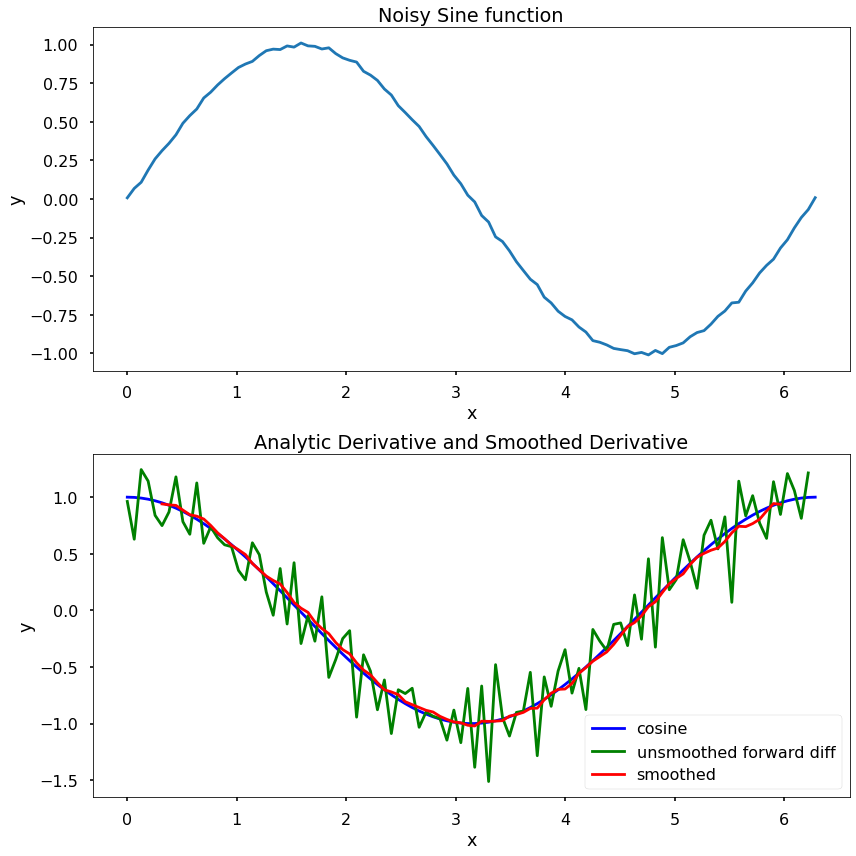

In [65]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(len(x))/100
[dy, X] = my_num_diff_w_smoothing(x, y, 4)
plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.plot(x, y)
plt.title('Noisy Sine function')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(212)
plt.plot(x, np.cos(x), 'b', label = 'cosine')
plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), 'g', \
    label = 'unsmoothed forward diff')
plt.plot(X, dy, 'r', label = 'smoothed')
plt.title('Analytic Derivative and Smoothed Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

##### **(3):** Define a Tayler series expansion **taylor(function, x0, n)**, which takes three parameters "function", "x0" and "n". Function is the function which you want to approximate; "x0" is the point where to approximate; "n" is the order of approximation.

In [66]:
#import modules and functions

from sympy import series, Symbol, pi
from sympy.functions import sin, cos, exp

In [67]:
#Define symbol
x=Symbol('x')

In [68]:
#function for Taylor series Expansion
def taylor(function, x0, n):
  return function.series(x, x0, n).removeO() #removeO()will remove the 0(x^n) term
  

In [69]:
print ('e(x) = ', taylor(exp(x), 0, 8))

e(x) =  x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1


In [70]:
print('sin(x) = ', taylor(sin(x), 0, 8))

sin(x) =  -x**7/5040 + x**5/120 - x**3/6 + x


In [71]:
print('cos(2x) = ', taylor(cos(2*x), pi, 8))

cos(2x) =  -4*(x - pi)**6/45 + 2*(x - pi)**4/3 - 2*(x - pi)**2 + 1


##### **(4)** plot sin(x) and its Taylor expansion (at x=0) for 1 term, 2 terms and 3 terms

In [72]:
from sympy.plotting import plot
import matplotlib.pyplot as plt
from sympy import series, Symbol, pi
from sympy.functions import sin

x=Symbol('x')
def taylor(function, x0, n):
  return function.series(x, x0, n).removeO() #removeO()will remove the 0(x^n) term
  

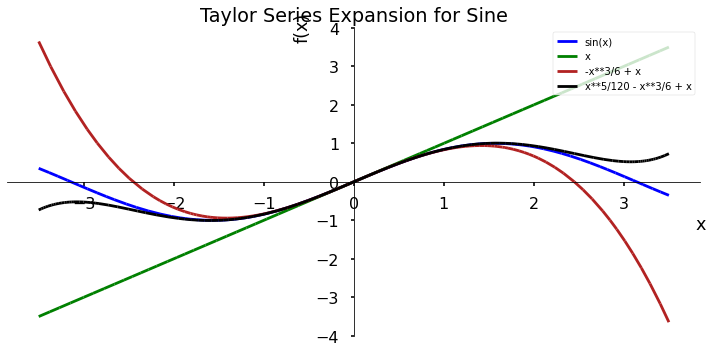

In [73]:
p = plot(sin(x), taylor(sin(x), 0, 2), taylor(sin(x),0,4), taylor(sin(x),0,6), (x, -3.5, 3.5), show = False)
plt.rcParams['figure.figsize'] = 10, 5 #Plot Size
p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
plt.rcParams['legend.fontsize']=10 #Legend Size
p.title = "Taylor Series Expansion for Sine"
p.legend = True
p.show()

##### **(5)** plot e^x and its Taylor expansion (at x=0) for first two terms, three terms, and four terms on interval [-1, 1] 

In [74]:
from sympy.plotting import plot
import matplotlib.pyplot as plt
from sympy import series, Symbol
from sympy.functions import exp

x=Symbol('x')

def taylor(function, x0, n):
  return function.series(x, x0, n).removeO() #removeO()will remove the 0(x^n) term
  


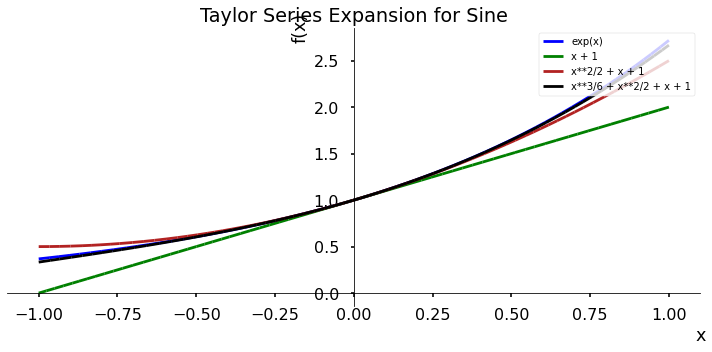

In [75]:
p = plot(exp(x), taylor(exp(x), 0, 2), taylor(exp(x),0,3), taylor(exp(x),0,4), (x, -1, 1), show = False)
plt.rcParams['figure.figsize'] = 10, 5 #Plot Size
p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
plt.rcParams['legend.fontsize']=10 #Legend Size
p.title = "Taylor Series Expansion for Sine"
p.legend = True
p.show()

##### **(6)** plot ln(x) and its Taylor expansion (at x = 1) for first two terms, three terms, four terms and five terms on the interval (0, 3]

In [76]:
from sympy.plotting import plot
import matplotlib.pyplot as plt
from sympy import series, Symbol
from sympy.functions import log

x=Symbol('x')

def taylor(function, x0, n):
  return function.series(x, x0, n).removeO() #removeO()will remove the 0(x^n) term

print('ln(x) = ', taylor(log(x), 1, 8))  

ln(x) =  x + (x - 1)**7/7 - (x - 1)**6/6 + (x - 1)**5/5 - (x - 1)**4/4 + (x - 1)**3/3 - (x - 1)**2/2 - 1


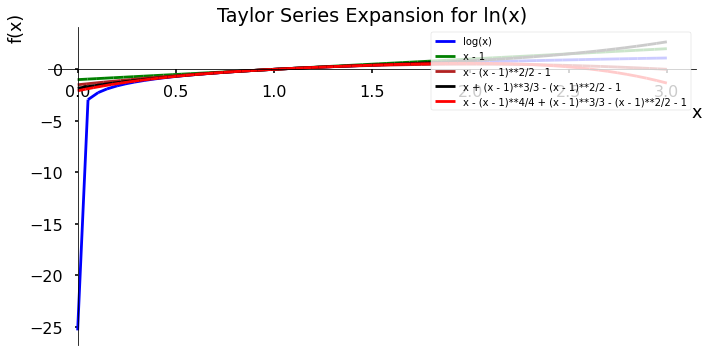

In [77]:
p = plot(log(x), taylor(log(x), 1, 2), taylor(log(x), 1, 3), taylor(log(x), 1, 4), taylor(log(x), 1, 5),
         (x, 0.00000000001, 3), show = False )

plt.rcParams['figure.figsize'] = 10, 5
p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p[4].line_color = 'red'
plt.rcParams['legend.fontsize']=10
p.legend = True
p.title = "Taylor Series Expansion for ln(x)"
p.show()